**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
  - 2.1. [Basic Edgeworth box](#toc2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [2]:
from ExchangeEconomy import ExchangeEconomyClass

### 2.1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

In [3]:
model = ExchangeEconomyClass()

# Question 1

Firstly we find all the pareto improvement allocations by using the following code. The allocations we find is the different combinations of X1A and X2A that leave both players as least as well off as they were when consuming their endowment. We find these allocations by using the functions for utility and consumption. We only show the first 5 in the first section.

In [4]:
import numpy as np

ua = model.utility_A(model.par.w1A, model.par.w2A)
ub = model.utility_B(1-model.par.w1A, 1-model.par.w2A)
N = 75

list=[]

for x1A in np.linspace(0, 1, N+1):
    for x2A in np.linspace(0, 1, N+1):
        x1B = 1 - x1A
        x2B = 1 - x2A
        
        utilia = model.utility_A(x1A, x2A)
        utilib = model.utility_B(x1B, x2B)
        if utilia >= ua and utilib >= ub:
            list.append((x1A,x2A))

print(list[:5])
x, y = zip(*list)

[(0.08, 0.9600000000000001), (0.09333333333333334, 0.88), (0.09333333333333334, 0.8933333333333334), (0.09333333333333334, 0.9066666666666667), (0.09333333333333334, 0.92)]


Now when we have found all the pareto improvement points, it is possible to show them in an Edgeworth box. In he first part of the code we specify the total endownment of each good. Secondly we set up the figure and create the design. After that we plot in the pareto improvemtent points in the scatter and we also illustrate the initial endowment.

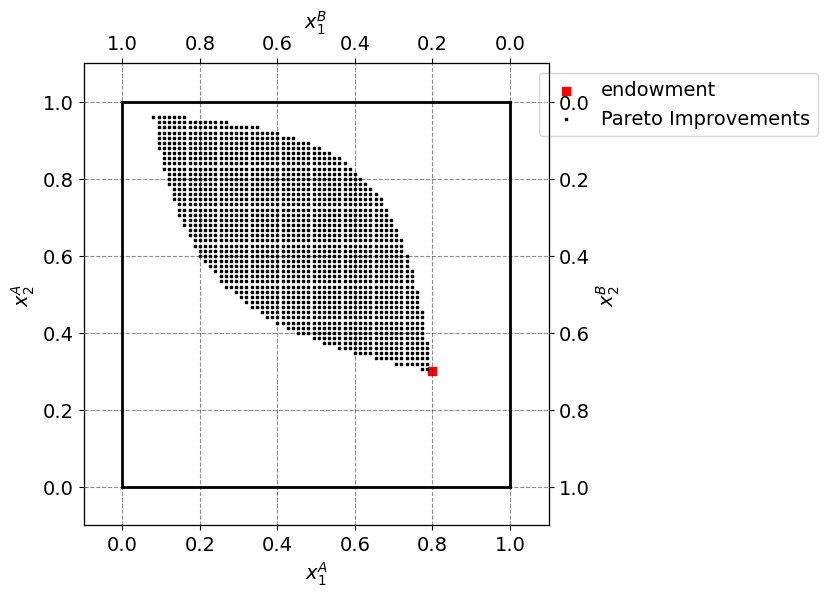

In [5]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='red',label='endowment')
ax_A.scatter(x,y,marker='s',color='black',label='Pareto Improvements', s=0.8)

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

# Question 2

In this question we want to calculate the error in the market clearing condition s. Firstly we define conditions for the price of good 1. We then use the code that we have created in the ExchangeEconomy file to calculate the errors and we print them. We use the code in the end to illustrate the total market clearing error against p1 values.

          p1      eps1      eps2
0   0.500000  0.533333 -0.266667
1   0.526667  0.475949 -0.250667
2   0.553333  0.424096 -0.234667
3   0.580000  0.377011 -0.218667
4   0.606667  0.334066 -0.202667
..       ...       ...       ...
71  2.393333 -0.363231  0.869333
72  2.420000 -0.365840  0.885333
73  2.446667 -0.368392  0.901333
74  2.473333 -0.370889  0.917333
75  2.500000 -0.373333  0.933333

[76 rows x 3 columns]


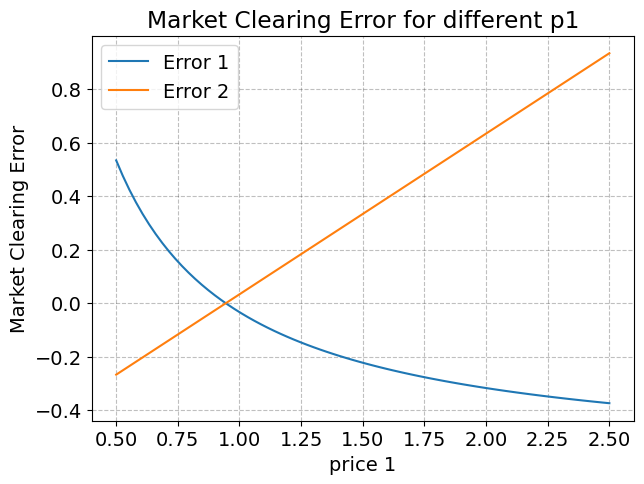

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Defining p1:
p1 = [(0.5 + 2*i/75) for i in range(76)]

# Caluculating the errors:
errors = [model.check_market_clearing(x) for x in p1]
eps1 = [x[0] for x in errors]
eps2 = [x[1] for x in errors]

# Importing Pandas:
import pandas as pd

# Creating dataframe:
df = pd.DataFrame({'p1': p1, 'eps1': eps1, 'eps2': eps2})
print(df)

# Plotting the total market clearing error:
plt.figure(figsize=(7, 5))
plt.plot(p1, eps1, label='Error 1')
plt.plot(p1, eps2, label='Error 2')
plt.xlabel('price 1')
plt.ylabel('Market Clearing Error')
plt.title('Market Clearing Error for different p1')
plt.legend()
plt.grid(True)
plt.show()



# Question 3

The market clearing price is the value of price 1 that makes the errors as small as possible. To find the market clearing price, we use code to calculate the price of good 1 where error of good 1 is the closest to zero. We find that the price then has to be 0.953.

In [7]:
# Epsilon close to zero
eps_zero = np.abs(eps1).argmin()

# Finding epsilon 1 closest to zero
market_clearing_price = p1[eps_zero]

# Printing the market clearing price
print(f"The market clearing price is {market_clearing_price:.3f}.")

The market clearing price is 0.953.


# Question 4A

We find the allocation if only prices in P1 can be chosen. Therefore, we first define the set of prices P1. After that we define an objective function we use to maximize agent A utility. For maximizing we first need an initial guess for p1. After that we define the bounds and maximize the utility for A. 

The resulting allocation maximizing agent A's utility with prices in P1 is:
xA1 = 0.62, xA2 = 0.64
Utility for agent A: 0.63
Price 1: 1.8993
Optimal xB1: 0.38
Optimal xB2: 0.36


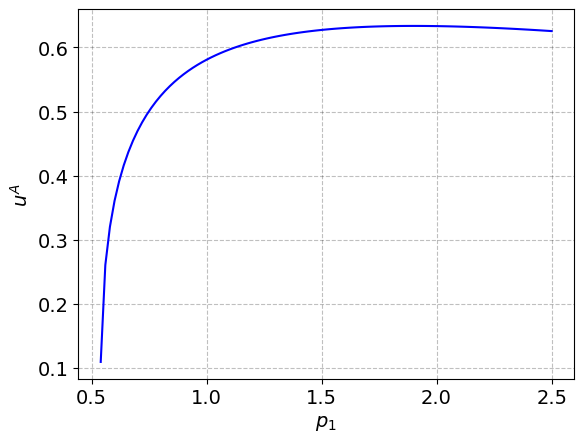

In [13]:
model = ExchangeEconomyClass()
from scipy.optimize import minimize
# Defining the set of prices P1
N = 100
P1 = np.linspace(0.5, 2.5, N+1)

# Defining the objective function to maximize agent A's utility
def objective(p1):
    xB1, xB2 = model.demand_B(p1)
    return -model.utility_A(1 - xB1, 1 - xB2)

# Choosing an initial guess for p1
p1_initial_guess = 1.0

# Define bounds for p1 based on P1
min_price = min(P1)
max_price = max(P1)
bounds = [(min_price, max_price)]

# Maximizing agent A's utility
result = minimize(objective, p1_initial_guess, bounds=bounds)

# Extracting the optimal p1
p1_optimal = result.x[0]

# Calculati ng the resulting allocation for agent A using the optimal price
xB1_optimal, xB2_optimal = model.demand_B(p1_optimal)
xA1_optimal = 1 - xB1_optimal
xA2_optimal = 1 - xB2_optimal

# Finding the utility of agent A for the resulting allocation
utility_A_optimal = model.utility_A(xA1_optimal, xA2_optimal)

list_uA = []

price_list = P1

for p1 in price_list:
    x1B, x2B = model.demand_B(p1)
    x1A = 1-x1B
    x2A = 1-x2B

    uA = model.utility_A(x1A, x2A)
    list_uA.append(uA)

# Assuming list_uA and price_list are defined and have the same length
list_uA = np.array(list_uA)
price_list = np.array(price_list)

# Finding the index of the maximum value in list_uA
index_of_max_uA = np.argmax(list_uA)

# Using the index to find the price
price_with_max_uA = price_list[index_of_max_uA]

# The maximum value for list_uA itself
max_uA_value = list_uA[index_of_max_uA]

# Creating a scatter plot to show agent A's untility for different p1
plt.plot(price_list, list_uA, marker='', color='blue')
plt.xlabel("$p_1$")
plt.ylabel("$u^A$")

# Printing the optimal allocation and utility for agent A and B
print("The resulting allocation maximizing agent A's utility with prices in P1 is:")
print(f"xA1 = {xA1_optimal:.2f}, xA2 = {xA2_optimal:.2f}")
print(f"Utility for agent A: {utility_A_optimal:.2f}")
print(f"Price 1: {p1_optimal:.4f}")
print(f"Optimal xB1: {xB1_optimal:.2f}")
print(f"Optimal xB2: {xB2_optimal:.2f}")

# Question 4B

In [12]:
from scipy import optimize
import numpy as np

def uA(p1):
    return model.utility_A(1-model.demand_B(p1)[0],1-model.demand_B(p1)[1])

obj_func = lambda p1: -uA(p1)
res = optimize.minimize(obj_func, p1_optimal, method="Nelder-Mead",
                        bounds=[(0, np.inf)])

print("The resulting allocation maximizing agent A's utility with prices in P1 is:")
print(f"xA1 = {xA1_optimal:.4f}, xA2 = {xA2_optimal:.4f}")
print(f"Utility for agent A:  {-res.fun:.4f}")
print(f"Price 1: {res.x[0]:.4f}")
print(f"Optimal xB1: {xB1_optimal:.2f}")
print(f"Optimal xB2: {xB2_optimal:.2f}")


The resulting allocation maximizing agent A's utility with prices in P1 is:
xA1 = 0.6210, xA2 = 0.6400
Utility for agent A:  0.6336
Price 1: 1.8994
Optimal xB1: 0.38
Optimal xB2: 0.36


# Question 5A

We now find the allocation if the choice set is restricted to C. We first set up the restriction C. After that we create arrays for the new allocations and then finding the corresponding utility and maximize the utility. After the maximum utility is found, it is posible find the allocation.

In [10]:
x_1AA = np.linspace(0,1,N+1)
x_2AA = np.linspace(0,1,N+1)

# Creating C
C = [
    (new_x1A, new_x2A) for new_x1A in x_1AA for new_x2A in x_2AA 
    if model.utility_A(new_x1A, new_x2A) >= model.utility_A(model.par.w1A, model.par.w2A) 
    and model.utility_B(1 - new_x1A, 1 - new_x2A) >= model.utility_B(1 - model.par.w1A, 1 - model.par.w2A)
]

# Creating arrays of all points for new_x1A,new_x2A in C
x_1aa = np.array([point[0] for point in C])
x_2aa = np.array([point[1] for point in C])

# Finding the corresponding utility and maximum
utility_aa=model.utility_A(x_1aa,x_2aa)
utility_max=utility_aa.max()

# Finding the indices of the maximum utility
indice_aa = utility_aa==utility_max

# Finding the allocation
allo_a1 = x_1aa[indice_aa][0]
allo_a2 = x_2aa[indice_aa][0]

## Summing up
print(f'Agent A allocation if choice set is restricted to C x1A = {allo_a1} and x2B = {allo_a2:.3f}')
print(f"Agent A utility = {model.utility_A(allo_a1,allo_a2):.3f}")

Agent A allocation if choice set is restricted to C x1A = 0.58 and x2B = 0.840
Agent A utility = 0.742


# Question 5B

Now we find the allocation if no further restrictions are imposed. It is done by firstly defining the function for utility A. We also derfine the constraint function. Then we set the bounds because it has to be between 0 and 1. We use the initial guess to find the allocation that maximize the utility for agent A. When the maximum is found, we call them opti_x1a and opti_x2a. 

In [11]:
from scipy import optimize
model = ExchangeEconomyClass()


# Defining utility A
def utility_A(x):
    return -model.utility_A(x[0], x[1])

# Defining the constraint function
def constraint(x):
    x1B = 1 - x[0]
    x2B = 1 - x[1]
    utility_BB = model.utility_B(1 - model.par.w1A, 1 - model.par.w2A)
    return model.utility_B(x1B, x2B) - utility_BB

cons = [{'type': 'ineq', 'fun': constraint}]

bounds = ((0,1), (0,1))

initial_guess = [0.1,0.1]

result = optimize.minimize(utility_A, initial_guess, method='SLSQP', bounds=bounds, constraints=cons)

opti_x1a = result.x[0]
opti_x2a = result.x[1]


# Printing the results
print(f'Agent A allocation if no further restrictions are imposed is x1A ={opti_x1a:.3f} and x2A = {opti_x2a:.3f}')
print(f"Agent A utility = {model.utility_A(opti_x1a,opti_x2a):.3f}")

Agent A allocation if no further restrictions are imposed is x1A =0.576 and x2A = 0.844
Agent A utility = 0.743


# Question 6A

In [80]:
# Objective function to maximize the sum of utilities
def objective(x):
    xA1, xA2 = x
    xB1 = 1 - xA1
    xB2 = 1 - xA2
    return -(model.utility_A(xA1, xA2) + model.utility_B(xB1, xB2))

# Initial guess for xA1 and xA2
x0 = [0.5, 0.5]

# Setting bounds for xA1 and xA2
bounds = ((0, 1), (0, 1))

# Optimization to maximize the sum of utilities
result = minimize(objective, x0, bounds=bounds)

# Finding the optimal allocation for agent A and B
xA_optimal = result.x
xB_optimal = (1 - xA_optimal[0], 1 - xA_optimal[1])

# Calculating the utility for A and B
util_A = model.utility_A(xA_optimal[0], xA_optimal[1])
util_B = model.utility_B(xB_optimal[0], xB_optimal[1])

# Print the optimal allocation for A and B with their utility values
print("The resulting allocation maximizing aggregate utility is:")
print(f"x1A = {xA_optimal[0]:.3f}, x2A = {xA_optimal[1]:.3f}")
print(f"x1B = {xB_optimal[0]:.3f}, x2B = {xB_optimal[1]:.3f}")
print(f"Agent A: {util_A:.3f}")
print(f"Agent B: {util_B:.3f}")


The resulting allocation maximizing aggregate utility is:
xA1 = 0.33, xA2 = 0.67
Utility for agent A: 0.53


# Question 6B

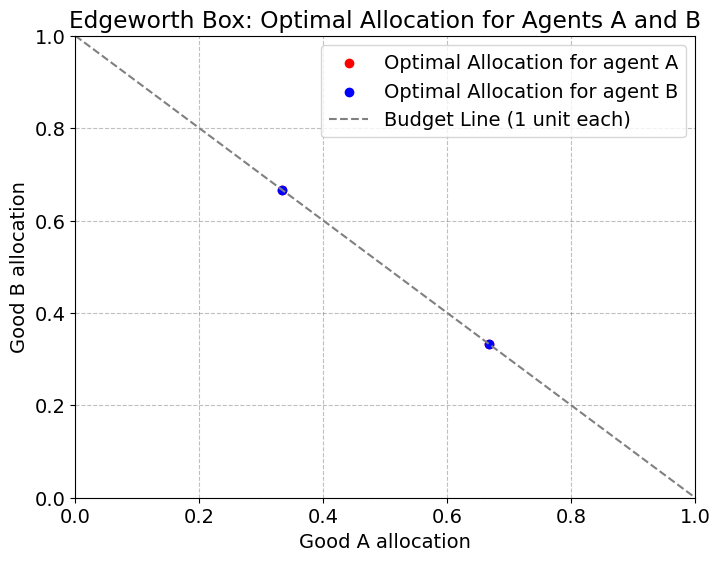

In [81]:
import matplotlib.pyplot as plt

# Define the optimal allocation points
xA1_optimal = xA_optimal[0]
xA2_optimal = xA_optimal[1]
xB1_optimal = xB_optimal[0]
xB2_optimal = xB_optimal[1]

# Reflecting points across the diagonal line
xA1_reflected = 1 - xB1_optimal
xA2_reflected = 1 - xB2_optimal
xB1_reflected = 1 - xA1_optimal
xB2_reflected = 1 - xA2_optimal

# Plot the allocation
plt.figure(figsize=(8, 6))
plt.scatter([xA1_optimal, xA2_optimal], [xB1_optimal, xB2_optimal], color='red', label='Optimal Allocation for agent A')
plt.scatter([xA1_reflected, xA2_reflected], [xB1_reflected, xB2_reflected], color='blue', label='Optimal Allocation for agent B')
plt.plot([0, 1], [1, 0], linestyle='--', color='gray', label='Budget Line (1 unit each)')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('Good A allocation')
plt.ylabel('Good B allocation')
plt.title('Edgeworth Box: Optimal Allocation for Agents A and B')
plt.legend()
plt.grid(True)
plt.show()

# Question 7

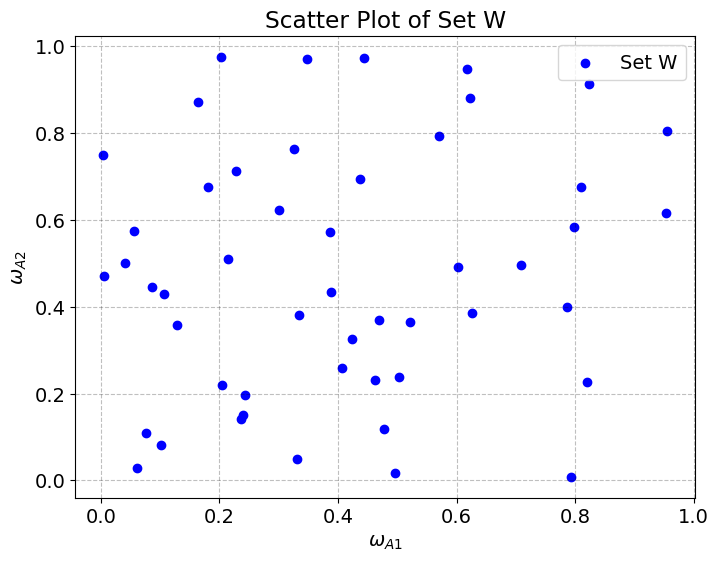

In [120]:
# Drawing a set W with 50 elements
W = np.random.rand(50, 2)

# Extracting the x and y coordinates
x_coords = W[:, 0]
y_coords = W[:, 1]

# Creating a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords, color='blue', label='Set W')
plt.title('Scatter Plot of Set W')
plt.xlabel('$\omega_{A1}$')
plt.ylabel('$\omega_{A2}$')
plt.legend()
plt.grid(True)
plt.show()

# Question 8

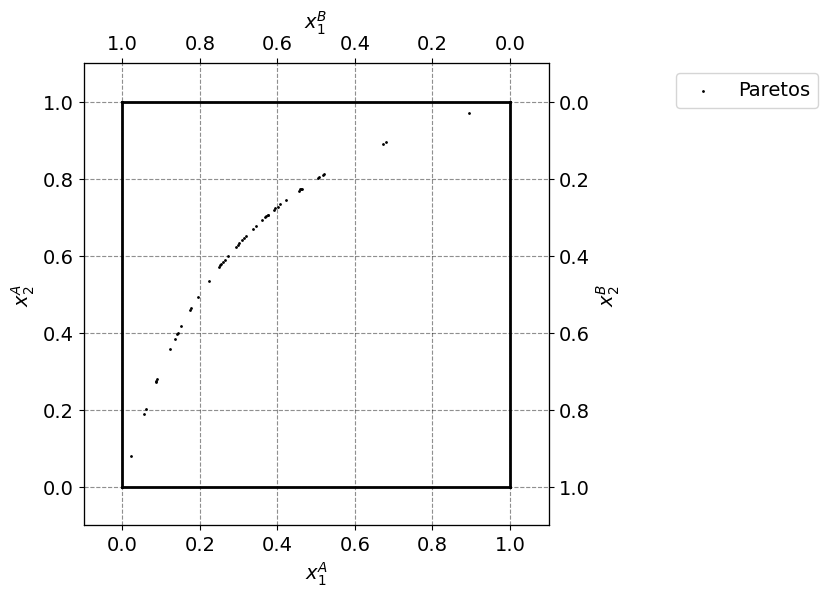

In [123]:
np.random.seed(4444)
N2 = 50

w1A = np.random.uniform(low=0, high=1, size=N2)
w2A = np.random.uniform(low=0, high=1, size=N2)

wlist = (zip(w1A, w2A))

initial_guess=1
bounds=[(0,np.inf)]

newxlist=[]
for w1A, w2A in wlist:
    res = optimize.minimize(
        lambda x: np.abs(model.marketclearnew(x,w1A,w2A)),initial_guess,
        method='Nelder-Mead',bounds=bounds
    )
    newxlist.append(tuple(map(float, model.newdemand_A(res.x[0],w1A,w2A))))

newx1list, newx2list = zip(*newxlist)

w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
#ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='Endowment')
ax_A.scatter(newx1list,newx2list,marker='o',color='black',s=1,label='Paretos')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));